# Customer Segmentation

In this notebook, an unsupervised machine learning algorithm is used in order to divide the dataset into smaller groups with similar characteristics. More specifically, certain attributes such as purchase history, demographics, spending habbits and more can be exploited so as to find groups with similar behaviour. 

Clustering algorithms are a common tool for performing unsupervised customer segmentation. These algorithms work by identifying patterns in the data and grouping similar observations together. For example, a clustering algorithm could make some groups of a dataset with customers based on the products they bought, how often they make purchases, or how much they spend. Also, they might include some demographics attributes such as their country, city and many more.

Some common clustering algorithms used for customer segmentation include K-means, Hierarchical clustering and DBSCAN.

The findings and the results of this analysis can be by individuals, organizations either in the private or public sector. In the private sector, managers can understand better their customers and be more effective in their decisions about how to market and serve different groups of customers. On the other hand, in the public sector such as universities or individuals can be helped from this analysis for further research.


### About the dataset

The dataset was taken from https://www.kaggle.com/ which is a website for machine learning. It includes datasets that can be used for machine learning applications.

For this analysis, I used the https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis which contains information regarding customers from a groceries company's database. The different attributes are illustrated below:

**People**

- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:** Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:** Amount spent on gold in last 2 years

**Promotion**

- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month


### Goal
The overall target is to divide the customers into similar groups.

### Acknowledgements
The dataset for this project is provided by Dr. Omar Romero-Hernandez.
Furthermore, the notebooks below were used as a reference for some code, ideas and explanations in this analysis:
- Customer Segmentation: Clustering - https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering - created by KARNIKA KAPOOR
- Customer Segmentation using Clustering - https://www.kaggle.com/code/johnybhiduri/customer-segmentation-using-clustering - created by JAINENDRA BHIDURI

## Step 1: Processing the dataset

In [1]:
import pandas as pd

In [2]:
#load the dataset
data = pd.read_csv(r'C:\Users\galan\OneDrive\Έγγραφα\Masterthesis_L&SCM\marketing_campaign (2).csv', sep='\t')

In [3]:
#printing the top 5 rows of the dataset
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#checking if there are any missing values and the data types of each attribute

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#checking if there are any null values in each attribute
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Data Cleaning

From the above results we can see that there are 24 missing values in Income attribute

So, we are going to drop the rows that have missing values

In [6]:
data.dropna(axis=0, inplace = True)

data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Feature Engineering

We make a new attribute which indicates the number of days a customer is registered to the system. In order to do this, the Dt_Customer attribute should be converted into date datatype.

In [7]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

data['Customer_days'] = data[['Dt_Customer']].max() - data[['Dt_Customer']]

data['Customer_days'] = pd.to_numeric(data['Customer_days'])

data[['Customer_days']]

,Customer_days
0,83894400000000000
1,10800000000000000
2,40780800000000000
3,5616000000000000
4,27734400000000000
...,...
2235,46742400000000000
2236,5270400000000000
2237,27216000000000000
2238,27302400000000000


Also, we can find  the age of each customer

In [8]:
data["Age"] = 2022 - data['Year_Birth']

There are some attributes which indicate the number of purchased products. From all of these we can create a new attribute called total_num_purchased which illustrates the total amount of products bought.

In [9]:
data['total_num_purchased'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

data[['total_num_purchased']]

,total_num_purchased
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


We can create a new attribute so as to have the number of children of each customer by adding the kidhome and teenhome columns

In [10]:
data['children'] = data['Kidhome'] + data['Teenhome']

data['children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: children, Length: 2216, dtype: int64

Now, let's create a new feature called family_members so as to have the number of the family size

In [11]:
#Check the distinct values of Marital_Status attribute

data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
data['family_members'] = data["Marital_Status"].replace({"Single": 1,"Divorced": 1,"Widow": 1,"Alone": 1,"Absurd": 1,"YOLO": 1, "Married":2, "Together":2})+ data['children']

data['family_members']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: family_members, Length: 2216, dtype: int64

Droping some non important features. The goal in a clustering problem is to group similar observations together based on the values of the attributes. In our case, characteristics like the ID, year of birth, Dt_Customer, Z_CostContact, Z_Revenue do not provide any information about the similarity of the observations. This means that they can be removed. Moreover, including attributes like the previous can also cause the model to overfit.

In [13]:
data.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace = True)

data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_days,Age,total_num_purchased,children,family_members
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,83894400000000000,65,1617,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,10800000000000000,68,27,2,3
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,40780800000000000,57,776,0,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,5616000000000000,38,53,1,3
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,27734400000000000,41,422,1,3


Let's take a look at some statistics of the dataset

In [14]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_days,Age,total_num_purchased,children,family_members
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000


### Managing the categorical variables

In [15]:
#keeping the attributes names in a list

data_col = data.columns
data_col = list(data_col)
data_col

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Customer_days',
 'Age',
 'total_num_purchased',
 'children',
 'family_members']

In order to check the distribution of categorical and numerical attributes, barplots and boxplots created respectively below

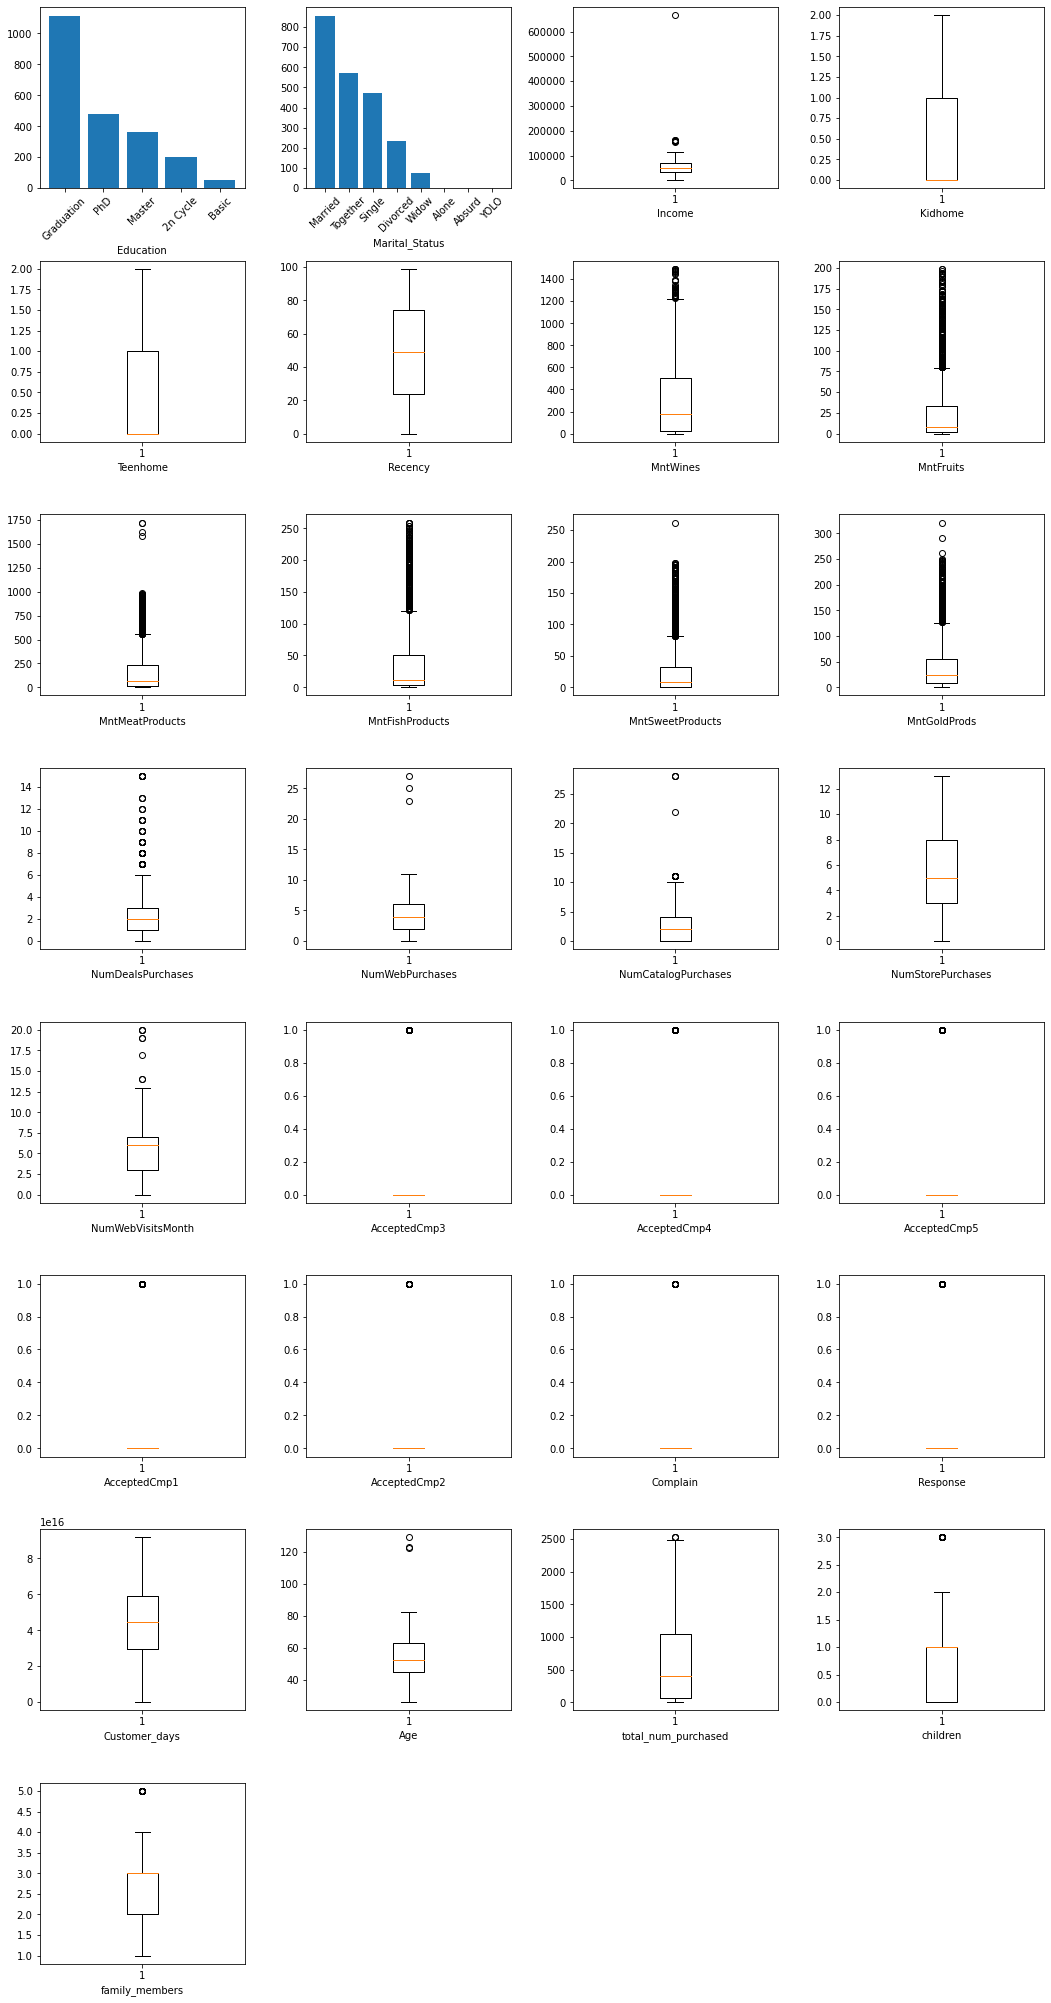

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 36))

# Increase the height and width of the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

i = 0
num_cols = []
object_cols = []
# Loop through the columns of the dataframe
for column in data_col:
    # Check the data type of the column
    if data[column].dtype in ['int64', 'float64']:
        ## Create box plots for the numerical input variables
        num_cols.append(column)
        i += 1
        plt.subplot(8,4, i)
        plt.boxplot(data[column])
        plt.xlabel(column)
    else:
        # Create bar plots for the categorical input variables
        object_cols.append(column)
        i += 1
        plt.subplot(8,4, i)
        plt.bar(data[column].value_counts().index, data[column].value_counts().values)
        plt.xticks(rotation=45)
        plt.xlabel(column)
plt.show()

From the above figure we can draw some information:

**Categorical features:**
- Most of the customers have graduated and also regarding the marital status most of the customers are married.

**Numerical features:**
- Income: one customer seems to have income around 600.000.
- Age: two customers are more than 120 years old.

The two above observations of the numerical features can lead us to delete these extreme values.

Moreover, it is important to observe that there are a lot of extreme values to attributes relevant to the amount of purchases of products like amount of fruits, amount of wines etc. If we take into account that these variables store the total number of purchases a customer makes to each type of product for 2 years, it seems logic to have some non average customers that have bought a lot of products.

In [17]:
#excluding some extreme values

data = data[(data["Age"]<98)]
data = data[(data["Income"]<600000)]

data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_days,Age,total_num_purchased,children,family_members
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,83894400000000000,65,1617,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,10800000000000000,68,27,2,3
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,40780800000000000,57,776,0,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,5616000000000000,38,53,1,3
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,27734400000000000,41,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,46742400000000000,55,1341,1,3
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,5270400000000000,76,444,3,5
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,0,27216000000000000,41,1241,0,1
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,27302400000000000,66,843,1,3


We create a new list that has first the numerical features and then the categorical in order to use it for the next stage which is the one-hot encoder

In [18]:
final_data = num_cols + object_cols
final_data

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Customer_days',
 'Age',
 'total_num_purchased',
 'children',
 'family_members',
 'Education',
 'Marital_Status']

Machines do not understand categorical features. Therefore, we need to convert these features into numerical ones. For this reason, we use the OneHotEncoder from the sklearn library which converts the categorical variables into a numerical form. The result is a binary vector with dimensionality equal to the number of categories (if drop_first parameter is set to True then the first dimension meaning the first category is not used. This is done for dimensionality reduction purposes). All the values in the vector are zero except for the index which corresponds to the caregory every time.

In [19]:
from sklearn.preprocessing import OneHotEncoder

X = data[object_cols].values

# OneHotEncoder() object
data_ohe = OneHotEncoder()

encoded_data = data_ohe.fit_transform(X).toarray()

encoded_data = pd.get_dummies(data[final_data], drop_first=True)

encoded_data

C:\Users\galan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,1,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,1,0,0,0,0,1,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,1,0,0,0,0,0,1,0,0


## Correlation among the attributes

This is an important process since it presents how strong is the correlation between the features. We can compute the Pearson coefficient which produces the pairwise correlations of the dataset attributes

In [20]:
correlations = encoded_data.corr()

# Compute the absolute values of the correlations
abs_correlations = correlations.abs()

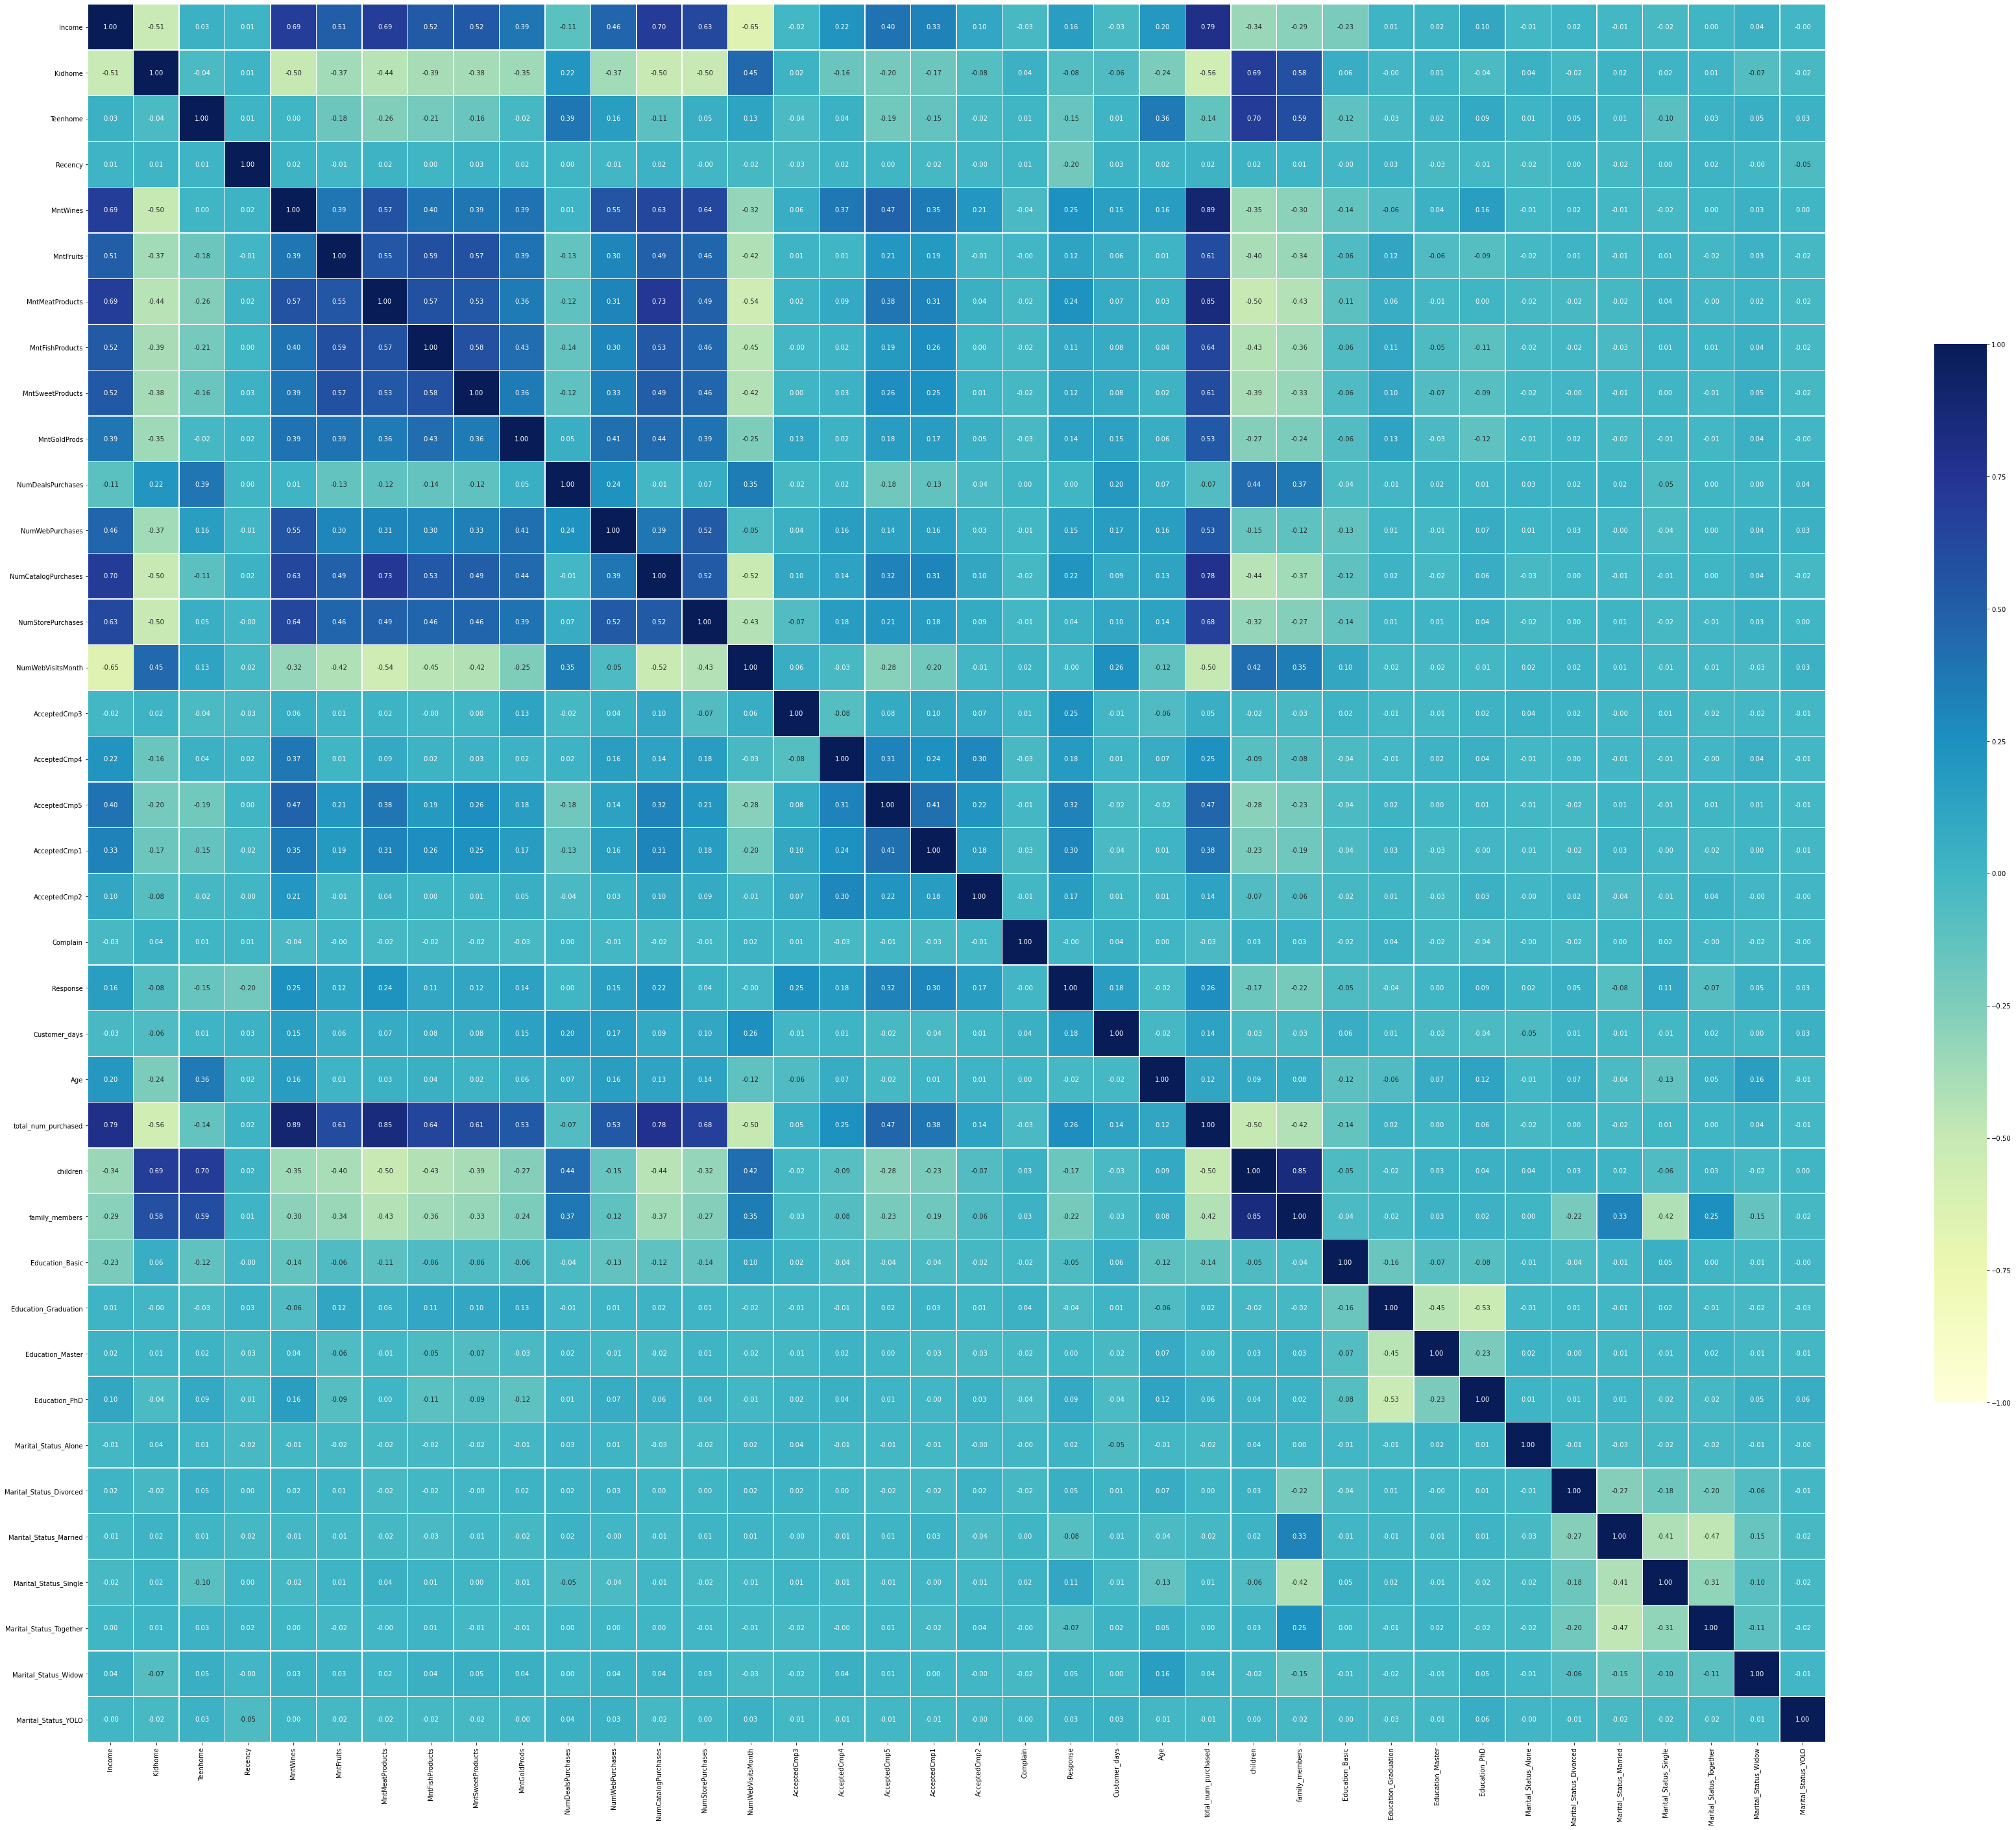

In [21]:
#Creating a heatmap with seaborn library

import seaborn as sns


f, ax = plt.subplots(figsize=(60, 60))

# Generating a custom diverging colormap
cmap = sns.color_palette("Blues", as_cmap=True)

# Drawing the heatmap
sns.heatmap(correlations, cmap="YlGnBu", vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

# Step 2: Standardization

Now, we should standardize the data since we are going to use k-means clustering algorithm. This is very imporant because this method uses Euckliean distance measure to calculate the similarity between data observations. Furthermore, this measure is sensitive to the scale of the variabels, therefore if there are any variables with a larger scale they will have a greater impact on the clustering results. Using standardization on the dataset will tranform the variables so as to have a mean of 0 and a standard deviation of 1. This means that the variables have similar scale and it allows for a fairer comparison of their influence on the clustering results.

In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the data
stand_data = scaler.fit_transform(encoded_data)

stand_data

array([[ 0.28710487, -0.82275354, -0.92969866, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [-0.26088203,  1.04002111,  0.90809708, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [ 0.9131964 , -0.82275354, -0.92969866, ...,  1.69525969,
        -0.18862801, -0.03008284],
       ...,
       [ 0.23334696, -0.82275354, -0.92969866, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [ 0.80317156, -0.82275354,  0.90809708, ...,  1.69525969,
        -0.18862801, -0.03008284],
       [ 0.04229031,  1.04002111,  0.90809708, ..., -0.58988012,
        -0.18862801, -0.03008284]])

# Step 3: Dimensionality Reduction

We will create a new target space with 3 dimensions by applying PCA technique on the standardized data and then use this new 3d space into k-means clustering technique.

This is a very imporant process since PCA (Principal Component Analysis) is a method used for dimensionality reduction. Using PCA with k-means clustering algorithm is quite usefull because it can help to reduce the number of features in the dataset. This results in making the clustering procedure more computationally efficient and can also help to avoid overfitting. Furthermore, PCA is a technique which helps to identify the underlyting structure of the dataset by identifying the principal components which can explain the most variation in the dataset. The principal components found can be utilized as inputs to the k-means algorithm. Having the most imporant parts of the data can help to improve the quality of the clustering results.

In [23]:
#Creating a new target space with 3 dimension

# Import PCA from scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

PCA_data = pd.DataFrame(pca.fit_transform(stand_data), columns=(["dim1","dim2", "dim3"]))

print("Dimensionality:", PCA_data.shape)

Dimensionality: (2212, 3)


In [24]:
PCA_data

,dim1,dim2,dim3
0,4.692402,-0.943239,-0.388102
1,-2.853769,-0.314835,-0.428173
2,2.037152,-0.533314,-1.406325
3,-2.703264,-1.535884,-0.600638
4,-0.646819,0.399362,-0.130172
...,...,...,...
2207,2.359628,1.741025,-1.985517
2208,-2.302000,4.513764,1.490453
2209,2.386060,-1.182760,0.776678
2210,1.499541,1.640825,-0.708882


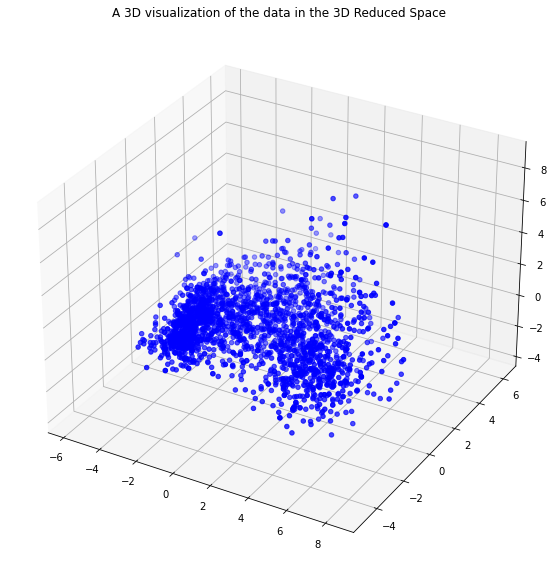

In [25]:
#A 3D visualization of the data in the 3D Reduced Space
x =PCA_data["dim1"]
y =PCA_data["dim2"]
z =PCA_data["dim3"]

#Plotting the figure
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D visualization of the data in the 3D Reduced Space")
plt.show()

# Step 4: Clustering

In this step we will use the K-means clustering method on the reduced target space with only 3 dimensions. This is a widely used technique in pattern recognition, data mining, and machine learning because it can unveil to uncover structure and patterns  in large and complex datasets.

This algorthm has some advantages such as its simplicity. To apply this method is easy to understand and implement, and it can be applied to a wide range of datasets. Furthermore, k-means is computationally efficient and thus can be used for large datasets.

Additionally, k-means algorithm can be utilized as a preprocessing step for other machine learning algorithms for example regression and classfication. Using clustering and recognizing patterns and structure of the data can improve the perfomance of the other machine learning methods.

Some of the applications that k-means can be used are image segmentation, market segmentation, anomaly detection and many more.

Below, we use the elbow technique which is a vital method in k-means clustering since it helps to identify the optimal number of clusters by measuring the within-cluster sum of squares (WCSS) for each value of k and selecting the value of k where the rate of change in WCSS begins to slow down. This results in avoiding overfitting and increasing the performance of the k-means model.

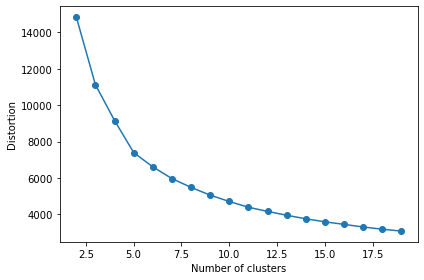

In [26]:
from sklearn.cluster import KMeans

inertias = []

# Run k-Means 20 times for different numbers of initial clusters (notice how n_cluster changes at each step of the loop)
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(PCA_data)
    inertias.append(km.inertia_)

# Plot the distortions of the 20 k-Means executions
plt.plot(range(2, 20), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

From the above diagram we can see that the optimal number of clusters is 5. This is the point where the 'Elbow' is creating

In [27]:
# Initialize k-Means and its hyper-parameters
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)

# Execute k-Means on the data points X
data_pred = km.fit_predict(PCA_data)

PCA_data['Clusters'] = data_pred

data['Clusters'] = data_pred

In [43]:
data_pred

array([4, 0, 4, ..., 4, 1, 3])

In [28]:
encoded_data['Clusters'] = data_pred

In [29]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_days,Age,total_num_purchased,children,family_members,Clusters
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,83894400000000000,65,1617,0,1,4
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,10800000000000000,68,27,2,3,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,40780800000000000,57,776,0,2,4
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,5616000000000000,38,53,1,3,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,27734400000000000,41,422,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,46742400000000000,55,1341,1,3,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,1,0,0,0,5270400000000000,76,444,3,5,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,27216000000000000,41,1241,0,1,4
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,27302400000000000,66,843,1,3,1


Inertia is utilized which is a measure of the compactness of the clusters in k-means clustering algorithm. The smaller the values the better the clustering.

This value is imporant as a quantitative measure of the quality of the clustering, to determine the optimal number of clusters. Also, it is a measure of the similarity between clusters and provides a way to compare the homogeneity of different clusters.

The degree to which the data observations within a cluster are similar to each other is referred as Homogeneity of clusters. Having a a high degree of homogeneity within a cluster in a k-means algorithm indicates that the data points within that cluster are close to the centroid of that cluster. Conversely, a low degree of homogeneity within a cluster means that the data points within that cluster are far from the centroid of that cluster.

In [32]:
# Print the inertia of our k-Means clustering
print('Distortion (inertia): %.3f' % km.inertia_)

Distortion (inertia): 7397.789


# Step 5: Visualization and evalutation of the model

In this stage we will visualize the clusters by making a 3D plot. Furthermore, we will use a metric and some figures so as to try and evaluate the perfomance of the model.

It is imporant to know that since we used an unsupervised machine learning model such as k-means clustering we do not have a tagged feature to evaluate or score our model meaning we do not know the true class of each point. Therefore, in this step we just try to study the patterns and trends in the clusters created and determine the nature of the clusters' patterns.

All in all, we will use apart from the silhouette score also exploratory data analysis and draw some conclusions.

Below the silhouette score is used. It is a metric utilized to evaluate the quality of clustering in k-means. Specifically, it provides a way to evaluate the quality of clustering which is independent of the number of clusters and it can be used to determine the optimal number of clusters.

It takes into account both the similarity within clusters and the dissimilarity between clusters which it is an imporant indicator of the cluster's homogeneity.

In general, a silhouette score ranges from -1 to 1. A good clustering will have a silhouette score close to 1 and a poor clustering will have a score close to -1. A silhouette score of around 0 indicates that the sample is on or close to the decision boundary between two clusters, which is not the ideal case.

In [33]:
from sklearn.metrics import silhouette_score

score = silhouette_score(PCA_data, km.labels_)

print(score)

0.47866049841596725


From the above result we can observe that the silhouette score is around 0.48 which means that the data point is moderately well-matched to its own cluster. Nevertheless, not as well-matched as it could be.  A silhouette scores between 0.4 and 0.5 are considered to be moderate which means that there could be some room for improvement.

In general, a moderate silhouette score could mean that the cluster is not very compact or well-defined, or that the data observations within the cluster are somehow similar to data points in other clusters.

In [34]:
#we use a variable pal so as to pass a list of hex colours to be used in the next visualization figures
import matplotlib.colors as mcolors

pal = ["#0047ab", "#aa201e", "#7ee23b", "#ffff66","#525659"]
custom_cmap = mcolors.ListedColormap(pal)

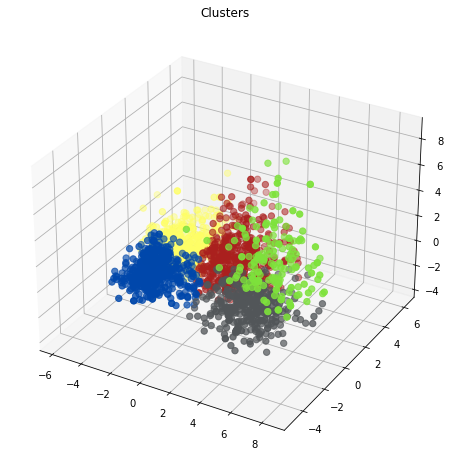

In [35]:
#plotting a figure in order to make a 3d projection on the reduced space after applying PCA and k-means clustering

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_data["Clusters"], marker='o', cmap = custom_cmap)
ax.set_title("Clusters")
plt.show()

From the above figure it seams roughly that the clusters are more or less capturing good the data in the reduced space.

Next, we plot the distribution of each cluster in the dataset with all the dimensions

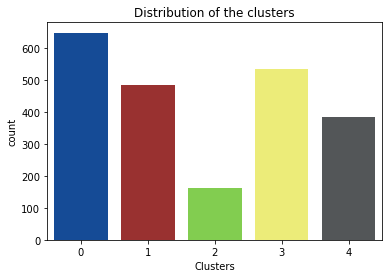

In [36]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution of the clusters")
plt.show()

We can observe from the above figure that the clusters are fairly distributed except cluster 2. Specifically, roughly 180 customers have been assigned to cluster 2. Whereas, cluster 0 has approximately 600 customers assigned to it.

Below, we use the total number of items purchased attribute and the income arribute in order to observe how the clusters behave between these two attributes in 2d space.

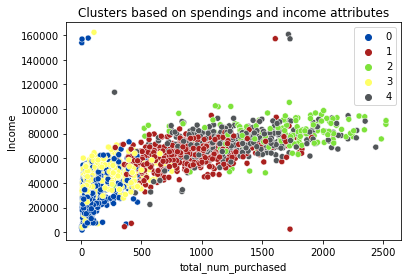

In [37]:
#Creating a 2d plot
pl = sns.scatterplot(data = data,x=data["total_num_purchased"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Clusters based on spendings and income attributes")
plt.legend()
plt.show()

From the above figure we can draw some conclusions for the 5 clusters created regarding the customers income and spending habits. More specifically, we can see:

- **Group 0:** low spendings and low income
- **Group 1:** low spendings and high income
- **Group 2:** high spendings and high income
- **Group 3:** low spendings and average income
- **Group 4:** average spendings and high income

Last but certainly not least, let's examine how the campains did by plotting the sum of campaigns and check which group accepted the most campaigns

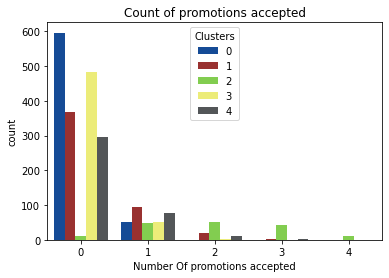

In [38]:
#Creating a new feature to get a sum of accepted campaigns 
data["Sum_promo"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total promotions accepted.
plt.figure()
pl = sns.countplot(x=data["Sum_promo"],hue=data["Clusters"], palette= pal)
pl.set_title("Count of promotions accepted")
pl.set_xlabel("Number Of promotions accepted")
plt.show()

The most important observation we can conclude from the above figure is that a small proportion of each of the 5 groups have accepted a promotion. Most of the groups have not accept any of the promotions.

Also, we can see that group 2 despite its lowest number of customers it has some customers who have accepted 4 times some of the promotions that the company did in the past.

All in all, it is vital to conclude that the promotional activities that the company did was not so accurate. It might be needed a better strategy regarding the targeted groups and more well-planned structure campaings.

# Conclusion

After cleaning the data, creating some attributes, applying standardization, reducing the number of features with PCA and applying k-means clustering algorithm we draw some conclusions based on exploratory analysis.

The results of this analysis can be utilized by a wide range of audiences, including individuals, groups of people either in the academic or the private sector. The results generated meaning findings and insights can provide valuable information for researchers in various fields, as well as be taken into consideration as informative information in   decision-making for individuals and organizations in the private sector. An important aspect of this analysis is that it offers versatility meaning it is applicable across diverse users and domains.